In [1]:
#import necessary package
import tensorflow as tf
#import tensorflow_federated as tff
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from collections import Counter
from keras.models import load_model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Load data
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0
#y_train = tf.keras.utils.to_categorical(y_train, 10)
#y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
x_test = x_test / 255.0
#y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
from collections import Counter
import numpy as np

#check the datashape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(len(x_train))
# Explore class distribution
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))
#print(y_train_new[6])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 10)
50000
Class Distribution (Top 10):
[(0, 50000)]


In [5]:
#Distribute 50000 into two set D and H
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [6]:
# D=40000 and H=10000
from collections import Counter

#check the datashape
print(x_train_new.shape)
print(x_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)
print(len(x_train_new))
# Explore class distribution
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train_new, axis=1)).most_common(10))
#print(y_train_new[6])

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)
40000
Class Distribution (Top 10):
[(0, 40000)]


In [7]:
#print(min(y_train[0]))

In [8]:
#distribute set D (40000) data to clients
from collections import defaultdict
client1_img = []
client1_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==0):
      client1_img.append(img)
      client1_label.append(label)

client2_img = []
client2_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==1):
      client2_img.append(img)
      client2_label.append(label)


client3_img = []
client3_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==2):
      client3_img.append(img)
      client3_label.append(label)

client4_img = []
client4_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==3):
      client4_img.append(img)
      client4_label.append(label)

client5_img = []
client5_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==4):
      client5_img.append(img)
      client5_label.append(label)

client6_img = []
client6_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==5):
      client6_img.append(img)
      client6_label.append(label)

client7_img = []
client7_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==6):
      client7_img.append(img)
      client7_label.append(label)

client8_img = []
client8_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==7):
      client8_img.append(img)
      client8_label.append(label)

client9_img = []
client9_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==8):
      client9_img.append(img)
      client9_label.append(label)

client10_img = []
client10_label=[]
for img, label in zip(x_train_new, y_train_new):
    if(label==9):
      client10_img.append(img)
      client10_label.append(label)

#print(len(client10_label))

In [9]:
print("Client 1 data: " +str(len(client1_img)) +" " +str(len(client1_label)))
print("Client 2 data: " +str(len(client2_img)) +" " +str(len(client2_label)))
print("Client 3 data: " +str(len(client3_img)) +" " +str(len(client3_label)))
print("Client 4 data: " +str(len(client4_img)) +" " +str(len(client4_label)))
print("Client 5 data: " +str(len(client5_img)) +" " +str(len(client5_label)))
print("Client 6 data: " +str(len(client6_img)) +" " +str(len(client6_label)))
print("Client 7 data: " +str(len(client7_img)) +" " +str(len(client7_label)))
print("Client 8 data: " +str(len(client8_img)) +" " +str(len(client8_label)))
print("Client 9 data: " +str(len(client9_img)) +" " +str(len(client9_label)))
print("Client 10 data: " +str(len(client10_img)) +" " +str(len(client10_label)))

Client 1 data: 4027 4027
Client 2 data: 4021 4021
Client 3 data: 3970 3970
Client 4 data: 3977 3977
Client 5 data: 4067 4067
Client 6 data: 3985 3985
Client 7 data: 4004 4004
Client 8 data: 4006 4006
Client 9 data: 3983 3983
Client 10 data: 3960 3960


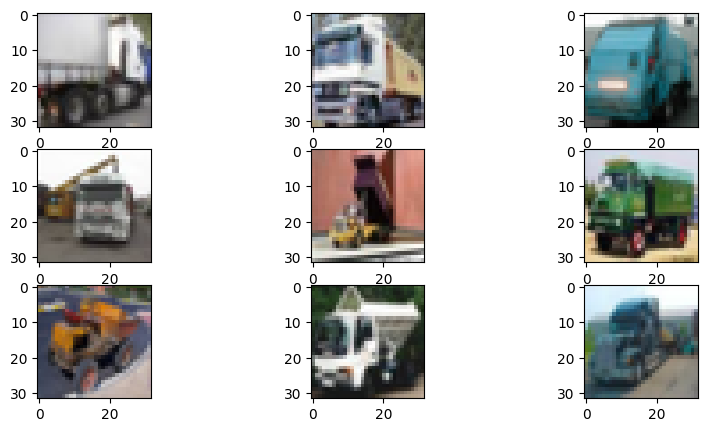

In [10]:
#print few data for a client
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(client10_img[i])
    #print(y_train[i])
plt.show()

In [12]:
# Take 10% of data to train global model initially
x_train_inc_10, x_test_inc_10, y_train_inc_10, y_test_inc_10 = train_test_split(x_test_new, y_test_new, test_size=0.1, random_state=42)

In [13]:
from collections import Counter

#check the datashape
print(x_train_inc_10.shape)
print(x_test_inc_10.shape)
print(y_train_inc_10.shape)
print(y_test_inc_10.shape)
print(len(x_train_inc_10))
# Explore class distribution
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train_inc_10, axis=1)).most_common(10))
#print(y_train_new[6])

(9000, 32, 32, 3)
(1000, 32, 32, 3)
(9000, 1)
(1000, 1)
9000
Class Distribution (Top 10):
[(0, 9000)]


In [14]:
# Take 10% of H (9000) 20, 30, 40, 50 60 ...
x_train_client, x_test_client, y_train_client, y_test_client = train_test_split(x_train_inc_10, y_train_inc_10, test_size=0.2, random_state=42)

In [15]:
from collections import Counter

#check the datashape
print(x_train_client.shape)
print(x_test_client.shape)
print(y_train_client.shape)
print(y_test_client.shape)
print(len(y_test_client))
# Explore class distribution
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train_client, axis=1)).most_common(10))
#print(y_train_new[6])

(7200, 32, 32, 3)
(1800, 32, 32, 3)
(7200, 1)
(1800, 1)
1800
Class Distribution (Top 10):
[(0, 7200)]


In [16]:
#Add  10% (900) data to clients

for img, label in zip(x_test_client, y_test_client):
      client1_img.append(img)
      client1_label.append(label)
      client2_img.append(img)
      client2_label.append(label)
      client3_img.append(img)
      client3_label.append(label)
      client4_img.append(img)
      client4_label.append(label)
      client5_img.append(img)
      client5_label.append(label)
      client6_img.append(img)
      client6_label.append(label)
      client7_img.append(img)
      client7_label.append(label)
      client8_img.append(img)
      client8_label.append(label)
      client9_img.append(img)
      client9_label.append(label)
      client10_img.append(img)
      client10_label.append(label)


In [17]:
#verify the shape for client 1 and 2

print("Client 1")
print(np.array(client1_img).shape)
print(np.array(client1_label))
print(len(client1_img))

print("Client 2")
print(np.array(client4_img).shape)
print(np.array(client4_label))
print(len(client2_img))

Client 1
(5827, 32, 32, 3)
[[0]
 [0]
 [0]
 ...
 [4]
 [2]
 [6]]
5827
Client 2
(5777, 32, 32, 3)
[[3]
 [3]
 [3]
 ...
 [4]
 [2]
 [6]]
5821


In [18]:
cx1_train= np.array(client1_img) / 255.0
cy1_train = tf.keras.utils.to_categorical(client1_label, 10)

cx2_train= np.array(client2_img) / 255.0
cy2_train = tf.keras.utils.to_categorical(client2_label, 10)

cx3_train= np.array(client3_img) / 255.0
cy3_train = tf.keras.utils.to_categorical(client3_label, 10)

cx4_train= np.array(client4_img) / 255.0
cy4_train = tf.keras.utils.to_categorical(client4_label, 10)

cx5_train= np.array(client5_img) / 255.0
cy5_train = tf.keras.utils.to_categorical(client5_label, 10)

cx6_train= np.array(client6_img) / 255.0
cy6_train = tf.keras.utils.to_categorical(client6_label, 10)

cx7_train= np.array(client7_img) / 255.0
cy7_train = tf.keras.utils.to_categorical(client7_label, 10)

cx8_train= np.array(client8_img) / 255.0
cy8_train = tf.keras.utils.to_categorical(client8_label, 10)

cx9_train= np.array(client9_img) / 255.0
cy9_train = tf.keras.utils.to_categorical(client9_label, 10)

cx10_train= np.array(client10_img) / 255.0
cy10_train = tf.keras.utils.to_categorical(client10_label, 10)
#cy1_test = tf.keras.utils.to_categorical(cy1_test, 10)

print(len(client1_img))


5827


In [19]:
x_test_inc_10 = np.array(x_test_inc_10) / 255.0
y_test_inc_10 = tf.keras.utils.to_categorical(y_test_inc_10, 10)
#cy2_test = tf.keras.utils.to_categorical(cy2_test, 10)



In [20]:
Total_train_data=(len(cx1_train)+len(cx2_train)+len(cx3_train)+len(cx4_train)+len(cx5_train)+len(cx6_train)+len(cx7_train)+len(cx8_train)+len(cx9_train)+len(cx10_train))
print(Total_train_data)
client_data_len=[]
#print(len(cx1_test))

client_data_len.append(len(cx1_train))
client_data_len.append(len(cx2_train))
client_data_len.append(len(cx3_train))
client_data_len.append(len(cx4_train))
client_data_len.append(len(cx5_train))
client_data_len.append(len(cx6_train))
client_data_len.append(len(cx7_train))
client_data_len.append(len(cx8_train))
client_data_len.append(len(cx9_train))
client_data_len.append(len(cx10_train))

print(client_data_len)

58000
[5827, 5821, 5770, 5777, 5867, 5785, 5804, 5806, 5783, 5760]


In [21]:
import numpy as np
import random
import cv2
import os
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models
from keras.layers import Dense, Input


class SimpleMLP:
    @staticmethod
    def build(shape,classes):
      model = Sequential()
      model.add(Input(shape=(32,32,3,)))
      model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
      model.add(layers.BatchNormalization())
      model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
      model.add(layers.BatchNormalization())
      model.add(layers.MaxPooling2D(pool_size=(2,2)))
      model.add(layers.Dropout(0.3))

      model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
      model.add(layers.BatchNormalization())
      model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
      model.add(layers.BatchNormalization())
      model.add(layers.MaxPooling2D(pool_size=(2,2)))
      model.add(layers.Dropout(0.5))

      model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
      model.add(layers.BatchNormalization())
      model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
      model.add(layers.BatchNormalization())
      model.add(layers.MaxPooling2D(pool_size=(2,2)))
      model.add(layers.Dropout(0.5))

      model.add(layers.Flatten())
      model.add(layers.Dense(128, activation='relu'))
      model.add(layers.BatchNormalization())
      model.add(layers.Dropout(0.5))
      model.add(layers.Dense(classes, activation='softmax'))    # num_classes = 10
      # compile model
      opt = SGD(learning_rate=0.01, momentum=0.9)
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      return model




def weight_scalling_factor(clients_trn_data, client_name):
    #client_names =
    #get the bs
    bs = 32 #list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = clients_trn_data #sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    #global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in clients_trn_data])*bs
    # get the total number of data points held by a client
    local_count = client_data_len[client_name]  #client_data_len[client_name] #tf.data.experimental.cardinality(client_data_len[client_name]).numpy()*bs
    #print(local_count)
    #print (global_count)
    #print("global_count:" +str(global_count))
    #print("local_count:" +str(local_count))
    #local_count=10
    #global_count=1
    return round(local_count/global_count,1)


def scale_model_weights(weight, scalar):
    #'''function for scaling a models weights'''
    #print("scalar:")
    #print (scalar)
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    #'''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad


def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [22]:
import numpy as np
import random
import cv2
import os
from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
from imutils import paths

global_acc_list = []
global_loss_list = []


#clients = create_clients(x_train, y_train, num_clients=10, initial='client')
#print(clients.items())
#process and batch the training data for each client
#clients_batched = dict()
#for (client_name, data) in clients.items():
 #   clients_batched[client_name] = batch_data(data)

#process and batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(len(y_test))

#comms_round = 10

#create optimizer
lr = 0.01
comms_round = 100
loss='categorical_crossentropy'
metrics = ['accuracy']
optimizer = SGD(learning_rate=lr,
                momentum=0.9
               )
#print(optimizer)

#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(32, 10)
global_model.fit(x_test_inc_10, y_test_inc_10, epochs=5, verbose=0,batch_size=32)

for comm_round in range(comms_round):
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()
    #randomize client data - using keys
    #client_names= list(clients_batched.keys())
    #print(client_names)
    #random.shuffle(client_names)
    #loop through each client and create new local model
    for client in range(10):
                            #print(clients_batched[client])
                            smlp_local = SimpleMLP()
                            local_model = smlp_local.build(32, 10)
                            local_model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
                            #set local model weight to the weight of the global model
                            #print("Model Summary for:")
                            #print (clients_batched[client])
                            #local_model.summary()
                            local_model.set_weights(global_weights)
                            #print(clients_batched[client])
                            #fit local model with client's data
                            if client==0:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx1_train, cy1_train, epochs=1, verbose=0,batch_size=32)
                            elif client==1:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx2_train, cy2_train, epochs=1, verbose=0,batch_size=32)
                            elif client==2:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx3_train, cy3_train, epochs=1, verbose=0,batch_size=32)
                            elif client==3:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx4_train, cy4_train, epochs=1, verbose=0,batch_size=32)
                            elif client==4:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx5_train, cy5_train, epochs=1, verbose=0,batch_size=32)
                            elif client==5:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx6_train, cy6_train, epochs=1, verbose=0,batch_size=32)
                            elif client==6:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx7_train, cy7_train, epochs=1, verbose=0,batch_size=32)
                            elif client==7:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx8_train, cy8_train, epochs=1, verbose=0,batch_size=32)
                            elif client==8:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx9_train, cy9_train, epochs=1, verbose=0,batch_size=32)
                            elif client==9:
                                optimizer = SGD(learning_rate=lr, momentum=0.9)
                                local_model.fit(cx10_train, cy10_train, epochs=1, verbose=0,batch_size=32)

                            #scale the model weights and add to list
                            #print(client)
                            #print(client_data_len[client])
                            #scaling_factor = weight_scalling_factor(Total_train_data, client_data_len[client])
                            scaling_factor = weight_scalling_factor(Total_train_data,client)
                            scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
                            scaled_local_weight_list.append(scaled_weights)
                            #clear session to free memory after each communication round
                            K.clear_session()
     #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
   #print(average_weights)
    #update global model
    global_model.set_weights(average_weights)
        #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
        global_acc_list.append(global_acc)
        global_loss_list.append(global_loss)
    #for(X_test, Y_test) in test_batched:
     #     global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
      #    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, global_acc, global_loss))
          #global_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
          #global_acc, global_loss = global_model.evaluate(X_test, y_test)
          #print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, global_acc, global_loss))



313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
comm_round: 0 | global_acc: 37.090% | global_loss: 2.2064573764801025
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
comm_round: 1 | global_acc: 38.100% | global_loss: 2.1991913318634033
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
comm_round: 2 | global_acc: 19.870% | global_loss: 2.2489235401153564
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step
comm_round: 3 | global_acc: 39.320% | global_loss: 2.1712214946746826
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step
comm_round: 4 | global_acc: 42.750% | global_loss: 2.1447737216949463
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
comm_round: 5 | global_acc: 43.930% | global_loss: 2.134913921356201
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
comm_round: 6 | global_acc: 42.210% | global_loss: 2.13470458984375
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
comm_round: 7 | global_acc: 46.130% | global_loss: 2.110048294067383
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
comm_round: 8 | global_acc: 48.590% | global_loss: 2.0951008

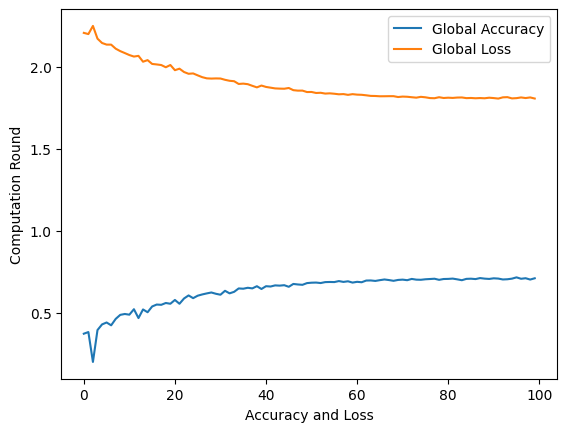

In [25]:
X=[]
for i in range(100):
    X.append(i)

#print(global_acc_list)

# Plot both lines
plt.plot(X,global_acc_list, label="Global Accuracy")
plt.plot(X,global_loss_list, label="Global Loss")

# Add labels and title
plt.xlabel('Accuracy and Loss')
plt.ylabel('Computation Round')
#plt.title('Two Lines on the Same Graph!')

# Show the legend
plt.legend()

# Display the plot
plt.show()
